    Area    value
0  Rural  284.403
1  Urban  366.859


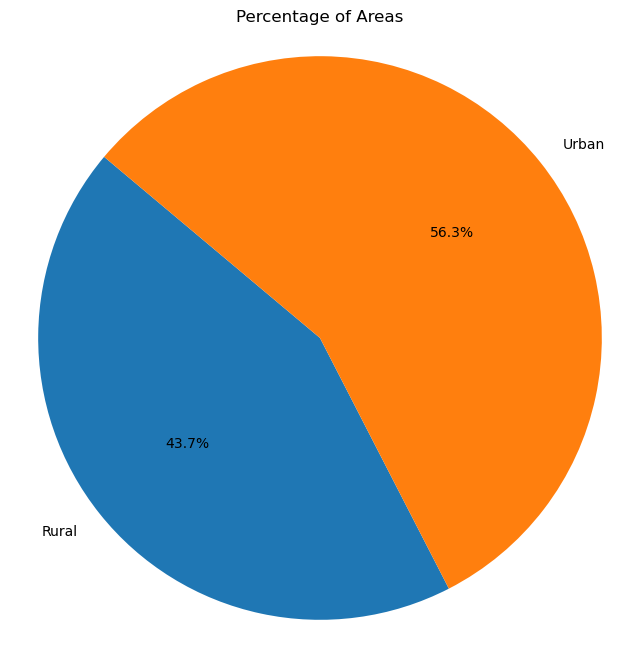

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Đường dẫn đến file CSV
file_path = 'TyLeTNNongThonThanhThiDaXuLy.csv'
# Đọc file CSV và lưu vào một DataFrame
df = pd.read_csv(file_path)
col = ['ref_area.label','indicator.label','source.label', 'sex.label', 'classif1.label', 'time', 'obs_status.label', 'note_classif.label','note_classif.label','note_source.label','note_indicator.label']
df.drop(columns=col, inplace=True)
df = df.rename(columns={'obs_value': 'value', 'classif2.label':'Area'})
df['Area'].replace('Area type: Rural', 'Rural', inplace=True)
df['Area'].replace('Area type: Urban', 'Urban', inplace=True)
# Hiển thị nội dung của DataFrame
print(df)
df.to_csv('TyLeTNNongThonThanhThiDalamSach.csv', encoding='utf-8', index=False, header=True)
# Tính toán phần trăm của mỗi nhóm Area
df_grouped = df.groupby('Area')['value'].sum()  # Lưu ý tên cột đã đổi thành 'value'
df_grouped_percentage = df_grouped / df_grouped.sum() * 100

# Chuyển đổi kết quả thành DataFrame mới
df_grouped_df = df_grouped_percentage.reset_index()
df_grouped_df.columns = ['Area', 'Percentage']

plt.figure(figsize=(8, 8))
plt.pie(df_grouped_df['Percentage'], labels=df_grouped_df['Area'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Areas')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()